In [1]:
print ('Hello World')

Hello World


Hello World in python 

Towards Data Science
Step-by-step Guide to Builiding Your Own Neural Network From Scratch
Marco Peixeiro

Import the Data

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

cat


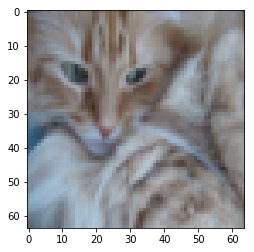

In [30]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
plt.imshow(train_set_x_orig[2])
print(classes[np.squeeze(train_set_y[:,25])].decode('utf-8'))

In [44]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print("# of training examples: m_train = " + str(m_train))
print("# of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("train_set_x shape:" + str(train_set_x_orig.shape))
print("train_set_y shape:" + str(train_set_y.shape))
print("test_set_x shape:" + str(test_set_x_orig.shape))
print("test_set_y shape:" + str(test_set_y.shape))

# of training examples: m_train = 209
# of testing examples: m_test = 50
Height/Width of each image: num_px = 64
train_set_x shape:(209, 64, 64, 3)
train_set_y shape:(1, 209)
test_set_x shape:(50, 64, 64, 3)
test_set_y shape:(1, 50)


In [47]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("Train_set_x_flatten shape: "+ str(train_set_x_flatten.shape))
print("train_set_y shape: "+ str(train_set_y.shape))
print ("test_set_x flatten shape: " + str(test_set_x_flatten.shape)) 
print("test_set_y shape: " + str(test_set_y.shape))

Train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x flatten shape: (12288, 50)
test_set_y shape: (1, 50)


Standardise our Dataset 

In [49]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

Choose the Activation Function

We wish to predict whether a picture has a cat or not. This is a binary classification problem (1 = cat, 0 = not a cat). 

Use sigmoid function. 


In [51]:
def sigmoid (z):
    s = 1 / (1 + np.exp(-z))
    return s

In [62]:
def initialise_with_zeros (dim):
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    assert (w.shape ==(dim, 1))
    assert (isinstance (b, float) or isinstance (b, int))
    
    return w, b


Define functions for forward propagation and back propagation

In [65]:
def propagate (w, b, X, Y):
    m = X.shape[1]
    
    #Forward
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y*np.log(A)+(1-Y) * (np.log(1-A)))
    
    #Back
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    return grads, cost

Repeat forward and back propagation to upadate the parameters in order to minimize the cost of the function. This is done using gradient descent.
We set a learning rate, a small positive value, that controls the magnitude of change of the parameters at each run.

A small learning rate = long time to train your network
A large learning rate = never reach global minimum 


In [54]:
def optimize (w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range (num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 ==0:
            print ('Cost after iteration %i: %f' % (i, cost))
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs


In [67]:
def predict (w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape (X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range (A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] >0.5 else 0
    assert (Y_prediction.shape == (1, m))
    return Y_prediction    
        

In [83]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    #Initialize parameters with 0s
    w, b = initialise_with_zeros(X_train.shape[0])
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #Retrive parameters w, b from dictionary
    w = parameters['w']
    b = parameters['b']
    
    #Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #Print test/train errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w': w,
         'b': b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}
    
    return d


In [84]:
d = model (train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


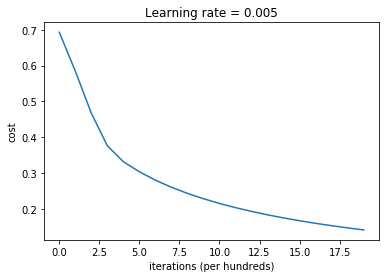

In [76]:
costs = np.squeeze (d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel ('iterations (per hundreds)')
plt.title("Learning rate = "+ str(d["learning_rate"]))
plt.show()
